# Data Analysis Assignment 1

Python version

Sebastian Bautista

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.datasets import load_boston

%matplotlib inline
sns.set(palette='colorblind', style='darkgrid')

### 0. Data preparation

In [2]:
boston = load_boston()

# The data is in dictionary format
pprint(boston)

{'DESCR': '.. _boston_dataset:\n'
          '\n'
          'Boston house prices dataset\n'
          '---------------------------\n'
          '\n'
          '**Data Set Characteristics:**  \n'
          '\n'
          '    :Number of Instances: 506 \n'
          '\n'
          '    :Number of Attributes: 13 numeric/categorical predictive. '
          'Median Value (attribute 14) is usually the target.\n'
          '\n'
          '    :Attribute Information (in order):\n'
          '        - CRIM     per capita crime rate by town\n'
          '        - ZN       proportion of residential land zoned for lots '
          'over 25,000 sq.ft.\n'
          '        - INDUS    proportion of non-retail business acres per '
          'town\n'
          '        - CHAS     Charles River dummy variable (= 1 if tract '
          'bounds river; 0 otherwise)\n'
          '        - NOX      nitric oxides concentration (parts per 10 '
          'million)\n'
          '        - RM       average num

In [3]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
y = boston.target
print(X.shape, y.shape)

(506, 13) (506,)


In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Changing feature names to lowercase and printing correlation matrix
X.columns = X.columns.str.lower()
X.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


### 1. Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

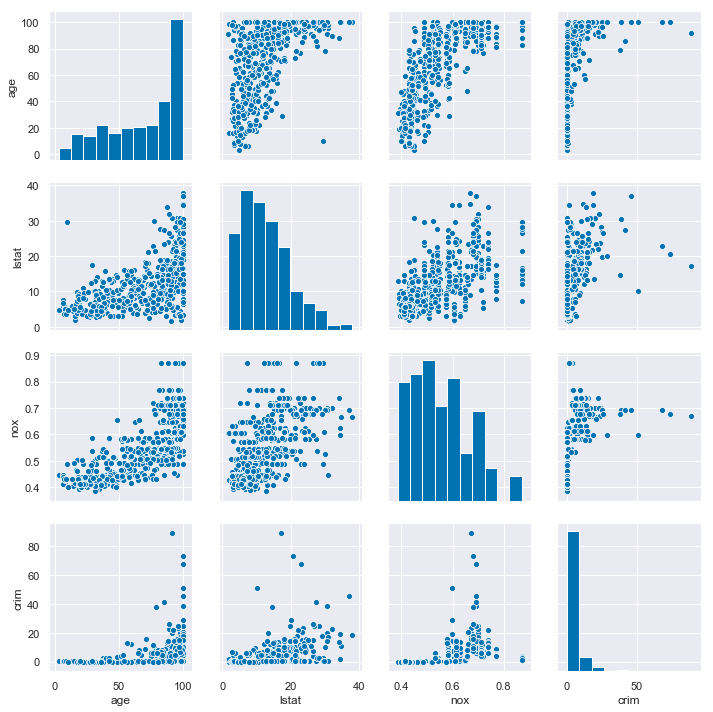

In [6]:
sns.pairplot(data=X, vars=['age', 'lstat', 'nox', 'crim'])

`age` is positively correlated with `lstat`, `crim`, and `nox`.

In other words, older towns in Boston are associated with lower incomes and higher rates of crime and pollution.

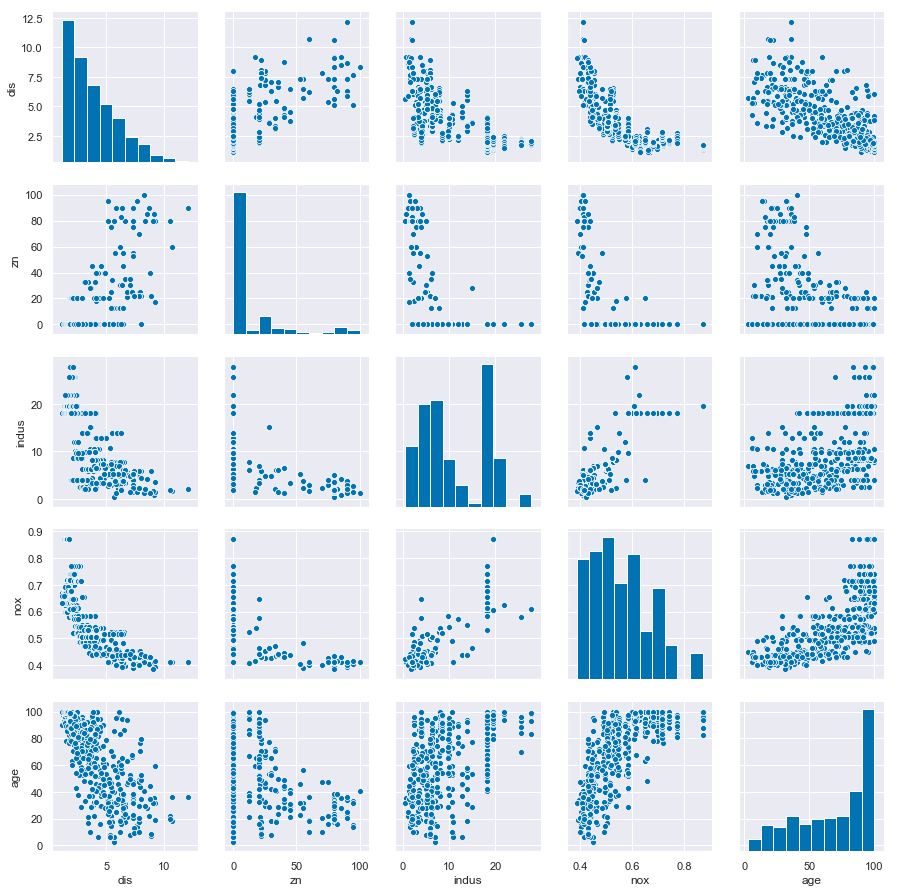

In [7]:
sns.pairplot(data=X, vars=['dis', 'zn', 'indus', 'nox', 'age'])

`dis` is positively correlated with `zn` and negatively correlated with `indus`, `nox`, and `age`.

Towns that are farther away from employment centers tend to have larger lots, newer buildings, less non-retail business, and less pollution.

### 2. Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

In [8]:
crimcorr = pd.DataFrame(X.corr()['crim'])
crimcorr['abs'] = crimcorr.crim.abs()
crimcorr.sort_values('abs', ascending=False)

,crim,abs
crim,1.000000,1.000000
rad,0.625505,0.625505
tax,0.582764,0.582764
lstat,0.455621,0.455621
nox,0.420972,0.420972
indus,0.406583,0.406583
b,-0.385064,0.385064
dis,-0.379670,0.379670
age,0.352734,0.352734
ptratio,0.289946,0.289946


`crim` is positively correlated with `rad`, `tax`, `lstat`, `nox`, `indus`, `age`, and `ptratio`, and negatively correlated with `dis`, `b`, `rm`, `zn`, and `chas` (slightly)

So, the towns with higher crime tend to also have higher accessibility to radial highways, higher property tax rates, more people with lower incomes, more pollution, more industry, older buildings, and more students for each teacher. They also tend to be closer to employment centers, have a smaller black population, have fewer rooms per dwelling, and have smaller lots.

### 3. Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor. You may find the summary() function useful.


In [9]:
X.describe().round(3).transpose()

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.614,8.602,0.006,0.082,0.257,3.677,88.976
zn,506.0,11.364,23.322,0.000,0.000,0.000,12.500,100.000
indus,506.0,11.137,6.860,0.460,5.190,9.690,18.100,27.740
chas,506.0,0.069,0.254,0.000,0.000,0.000,0.000,1.000
nox,506.0,0.555,0.116,0.385,0.449,0.538,0.624,0.871
rm,506.0,6.285,0.703,3.561,5.886,6.208,6.624,8.780
age,506.0,68.575,28.149,2.900,45.025,77.500,94.075,100.000
dis,506.0,3.795,2.106,1.130,2.100,3.207,5.188,12.126
rad,506.0,9.549,8.707,1.000,4.000,5.000,24.000,24.000
tax,506.0,408.237,168.537,187.000,279.000,330.000,666.000,711.000


Text(0.5, 1.0, 'Boxplot of features')

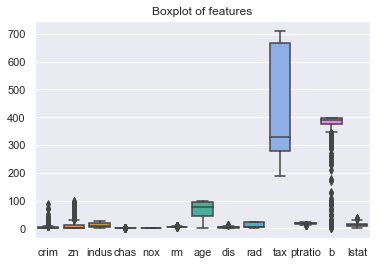

In [10]:
sns.boxplot(data=X)
plt.title('Boxplot of features')

Text(0.5, 1.0, 'Swarmplot of features')

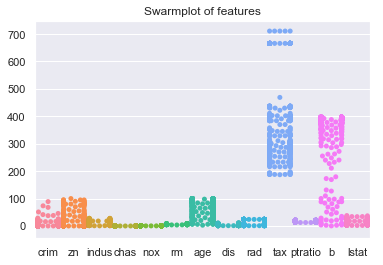

In [11]:
sns.swarmplot(data=X)
plt.title('Swarmplot of features')

It looks like there is a group of towns with well above-average property tax rates.

It might be helpful to look at scaled data so we can compare our features more evenly.

Text(0.5, 1.0, 'Boxplot of features scaled to mean 0 and variance 1')

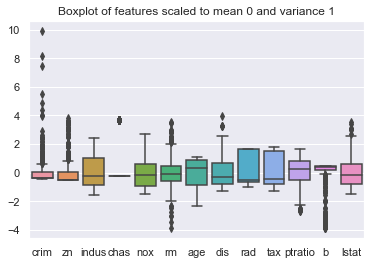

In [12]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns)
sns.boxplot(data=X_scaled_df)
plt.title('Boxplot of features scaled to mean 0 and variance 1')

Text(0.5, 1.0, 'Swarmplot of features scaled to mean 0 and variance 1')

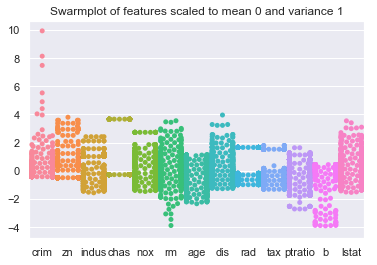

In [13]:
sns.swarmplot(data=X_scaled_df)
plt.title('Swarmplot of features scaled to mean 0 and variance 1')

There are a few towns with relatively high crime, but most are safe. There is a large variance in the number of rooms per dwelling from town to town (lots of positive and negative outliers). `b` or the black population seems to be bimodal, with towns mostly either having a decently sized black population or very few. There are positive outliers for `lstat` which represent towns with a large amount of lower income people.

### 4. How many of the suburbs in this data bound the Charles river?

In [14]:
X.chas.value_counts()

0.0    471
1.0     35
Name: chas, dtype: int64

35/506 of the towns in the data bound the Charles river.

### 5. What is the median pupil-teacher ratio among the towns in this dataset?

19.05

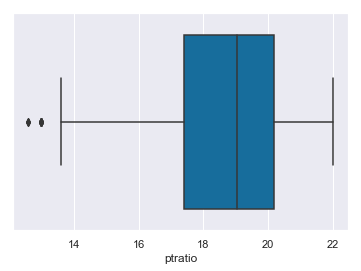

In [15]:
sns.boxplot(X.ptratio)
X.ptratio.median()

### 6. Which suburb of Boston has the lowest median value of owner-occupied homes? What are the values of the other predictors for that suburb, and how do these values compare to the overall ranges of those predictors? Comment on your findings.

In [16]:
# Put target variable into X
X['medv'] = y

# Find rows with lowest value of medv
lowest_medv = X.loc[X.medv == min(X.medv), :]
lowest_medv

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0


In [17]:
# Concatenate min and max for easier comparison
lowest_medv = lowest_medv.transpose()
lowest_medv['min'] = X.describe().transpose()['min']
lowest_medv['max'] = X.describe().transpose()['max']
lowest_medv.transpose()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
398,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
405,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
min,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73,5.0
max,88.97620,100.0,27.74,1.0,0.871,8.780,100.0,12.1265,24.0,711.0,22.0,396.90,37.97,50.0


The two suburbs with the lowest median value homes have medium-high crime rates, no large lots, more non-retail business than average, don't bound the Charles, have slightly more pollution, fewer rooms, the oldest buildings, are close to employment centers, are highly accessible to highways, have very high property taxes, nearly the highest pupil-teacher ratios, the highest black population, and a high proportion of lower income people.

### 7. In this dataset, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [18]:
gt_7rooms = X.loc[X.rm > 7, :]
print(gt_7rooms.shape[0], 'suburbs average more than 7 rooms per dwelling')
gt_8rooms = X.loc[X.rm > 8, :]
print(gt_8rooms.shape[0], 'suburbs average more than 8 rooms per dwelling')

64 suburbs average more than 7 rooms per dwelling
13 suburbs average more than 8 rooms per dwelling


In [19]:
# Concatenate subsample mean and median for comparison
new_df = pd.DataFrame()
new_df['min'] = X.describe().transpose()['min']
new_df['max'] = X.describe().transpose()['max']
new_df['sample_mean'] = gt_8rooms.describe().transpose()['mean']
new_df['sample_med'] = gt_8rooms.describe().transpose()['50%']
new_df

,min,max,sample_mean,sample_med
crim,0.00632,88.9762,0.718795,0.52014
zn,0.00000,100.0000,13.615385,0.00000
indus,0.46000,27.7400,7.078462,6.20000
chas,0.00000,1.0000,0.153846,0.00000
nox,0.38500,0.8710,0.539238,0.50700
rm,3.56100,8.7800,8.348538,8.29700
age,2.90000,100.0000,71.538462,78.30000
dis,1.12960,12.1265,3.430192,2.89440
rad,1.00000,24.0000,7.461538,7.00000
tax,187.00000,711.0000,325.076923,307.00000


The 13 suburbs that average more than 8 rooms per dwelling have extremely low crime rates, low non-retail industry, slightly older buildings, are closer to employment centers, have less access to highways, have moderate property taxes and pupil-teacher ratios, have a relatively large black population, and a relatively small low-income population.